## Monte Carlo Method
### A demonstration of using Monte Carlo to find pi.

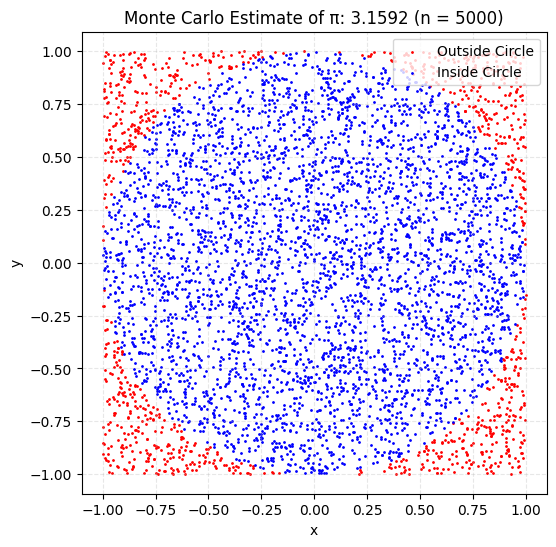

3.1592

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_pi(n_samples=10000, visualize=True):
    # Random points in the square [-1, 1] x [-1, 1]
    x = np.random.uniform(-1, 1, n_samples)
    y = np.random.uniform(-1, 1, n_samples)
    
    # Check which points fall inside the unit circle
    inside_circle = x**2 + y**2 <= 1
    pi_estimate = 4 * np.mean(inside_circle)

    if visualize:
        plt.figure(figsize=(6, 6))
        plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label='Outside Circle')
        plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label='Inside Circle')
        plt.title(f'Monte Carlo Estimate of π: {pi_estimate:.4f} (n = {n_samples})')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axis('equal')
        plt.legend(loc='upper right')
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.show()

    return pi_estimate

# Run the simulation with visualization
estimate_pi(n_samples=5000)


## Estimate the Area Under the Curve

Estimated integral: 1.99802
Standard error: 0.00972
95% Confidence Interval: (1.97896, 2.01707)


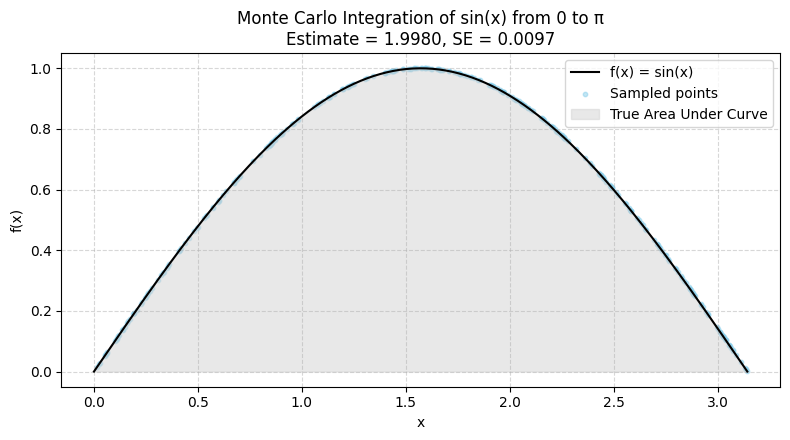

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to integrate
def f(x):
    return np.sin(x)

# Monte Carlo Integration
def monte_carlo_integrate(f, a, b, n=10000):
    x = np.random.uniform(a, b, n)
    fx = f(x)
    estimate = (b - a) * np.mean(fx)
    std_error = (b - a) * np.std(fx, ddof=1) / np.sqrt(n)
    return estimate, std_error, x, fx

# Estimate the integral
a, b = 0, np.pi
n_samples = 10000
estimate, se, x_samples, y_samples = monte_carlo_integrate(f, a, b, n_samples)

# Output
print(f"Estimated integral: {estimate:.5f}")
print(f"Standard error: {se:.5f}")
print(f"95% Confidence Interval: ({estimate - 1.96*se:.5f}, {estimate + 1.96*se:.5f})")

# Visualization
x_plot = np.linspace(a, b, 300)
y_plot = f(x_plot)

plt.figure(figsize=(8, 4.5))
plt.plot(x_plot, y_plot, label='f(x) = sin(x)', color='black')
plt.scatter(x_samples[:300], y_samples[:300], color='skyblue', s=10, alpha=0.5, label='Sampled points')
plt.fill_between(x_plot, 0, y_plot, color='lightgray', alpha=0.5, label='True Area Under Curve')
plt.title(f"Monte Carlo Integration of sin(x) from 0 to π\nEstimate = {estimate:.4f}, SE = {se:.4f}")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Bootstrap Method
#### You have a small dataset of exam scores and want to estimate the mean and its uncertainty (confidence interval) using bootstrap resampling.

Original sample mean: 75.80
Bootstrap mean estimate: 75.74
95% Confidence Interval: (71.40, 80.50)


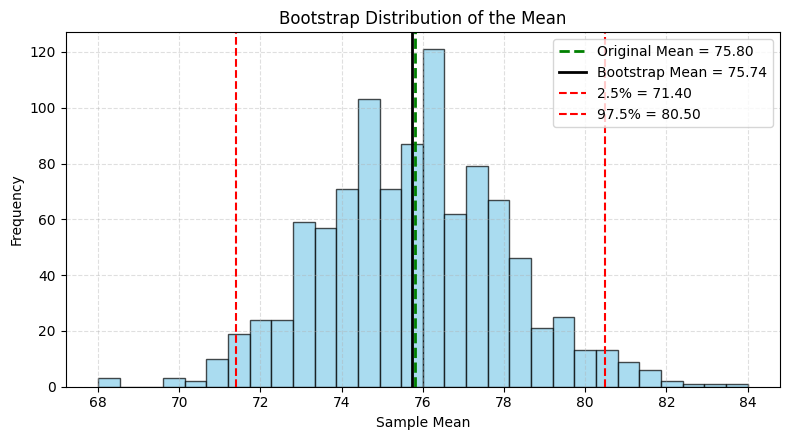

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Original sample (e.g., exam scores)
data = np.array([72, 65, 78, 80, 74, 68, 90, 85, 77, 69])
n = len(data)

# Calculate original sample mean
original_mean = np.mean(data)
print(f"Original sample mean: {original_mean:.2f}")

# Bootstrap settings
n_bootstraps = 1000
boot_means = []

# Bootstrap resampling
np.random.seed(42)
for _ in range(n_bootstraps):
    sample = np.random.choice(data, size=n, replace=True)
    boot_means.append(np.mean(sample))

# Convert to array
boot_means = np.array(boot_means)

# Compute bootstrap statistics
bootstrap_mean = np.mean(boot_means)
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

# Output results
print(f"Bootstrap mean estimate: {bootstrap_mean:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

# Visualization
plt.figure(figsize=(8, 4.5))
plt.hist(boot_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(original_mean, color='green', linestyle='--', linewidth=2, label=f'Original Mean = {original_mean:.2f}')
plt.axvline(bootstrap_mean, color='black', linestyle='-', linewidth=2, label=f'Bootstrap Mean = {bootstrap_mean:.2f}')
plt.axvline(ci_lower, color='red', linestyle='--', label=f'2.5% = {ci_lower:.2f}')
plt.axvline(ci_upper, color='red', linestyle='--', label=f'97.5% = {ci_upper:.2f}')
plt.title('Bootstrap Distribution of the Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Bootstrap Principle for Linear Regression

Original slope: 1.932
Original intercept: 2.324

95% CI for slope: (1.583, 2.206)
95% CI for intercept: (0.718, 4.510)


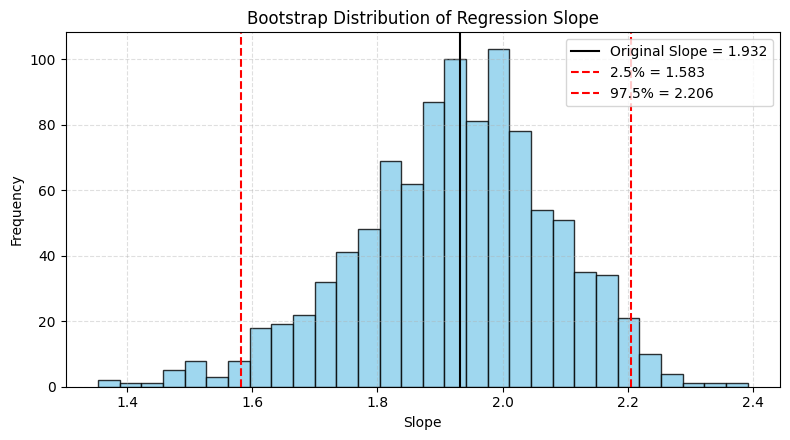

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Simulated data
np.random.seed(42)
x = np.linspace(0, 10, 20)
y = 2.5 * x + np.random.normal(0, 3, size=len(x))  # true slope = 2.5

# Reshape for sklearn
X = x.reshape(-1, 1)

# Fit original model
model = LinearRegression().fit(X, y)
original_slope = model.coef_[0]
original_intercept = model.intercept_
print(f"Original slope: {original_slope:.3f}")
print(f"Original intercept: {original_intercept:.3f}")

# Bootstrap settings
n_bootstraps = 1000
boot_slopes = []
boot_intercepts = []

for _ in range(n_bootstraps):
    indices = np.random.choice(len(x), size=len(x), replace=True)
    X_sample = X[indices]
    y_sample = y[indices]
    model = LinearRegression().fit(X_sample, y_sample)
    boot_slopes.append(model.coef_[0])
    boot_intercepts.append(model.intercept_)

# Confidence intervals
slope_ci = np.percentile(boot_slopes, [2.5, 97.5])
intercept_ci = np.percentile(boot_intercepts, [2.5, 97.5])

print(f"\n95% CI for slope: ({slope_ci[0]:.3f}, {slope_ci[1]:.3f})")
print(f"95% CI for intercept: ({intercept_ci[0]:.3f}, {intercept_ci[1]:.3f})")

# 📈 Visualization: Bootstrap distribution of slope
plt.figure(figsize=(8, 4.5))
plt.hist(boot_slopes, bins=30, color='skyblue', edgecolor='black', alpha=0.8)
plt.axvline(original_slope, color='black', linestyle='-', label=f'Original Slope = {original_slope:.3f}')
plt.axvline(slope_ci[0], color='red', linestyle='--', label=f'2.5% = {slope_ci[0]:.3f}')
plt.axvline(slope_ci[1], color='red', linestyle='--', label=f'97.5% = {slope_ci[1]:.3f}')
plt.title('Bootstrap Distribution of Regression Slope')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
